# Handwriting Recognition using K-Means - Centroids

Build a handwritting recognition model

* ATMs can recognize handwritten bank checks
* Evernote can recognize handwritten task lists
* Expensify can recognize handwritten receipts

Dataset: Handwritten digits of 30 Turkish people (from the 1990’s)

### Import Libraries

In [198]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

### Load Data

* Number of Instances: 1797
* Number of Attributes: 64
* Attribute Information: 8x8 image of integer pixels in the range 0..16.
* Missing Attribute Values: None

In [199]:

digits = datasets.load_digits()     # Handwriting digits dataset

print(digits.data)  # Pixel Data 16bit 0 White - 16 Black
print(digits.target)    # Handwritting 0, 1,... 9

print(digits.DESCR)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted for

### Visualize Images

<Figure size 640x480 with 0 Axes>

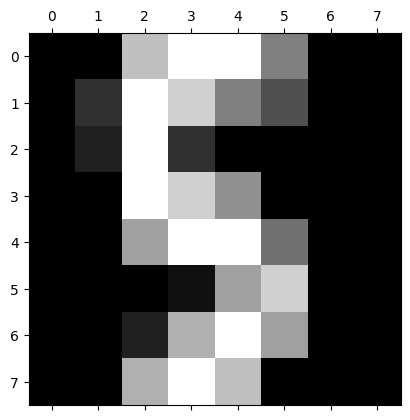

5


<Figure size 640x480 with 0 Axes>

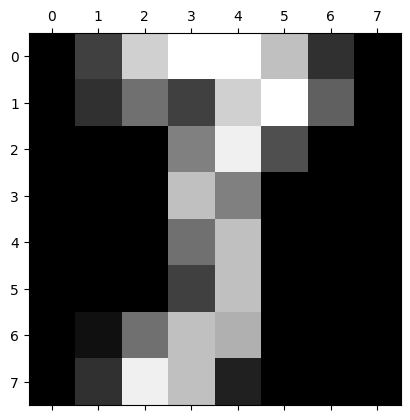

3


In [200]:
for i in range(102, 104):
    plt.gray()
    plt.matshow(digits.images[i])
    plt.show()
    print(digits.target[i])

### All images

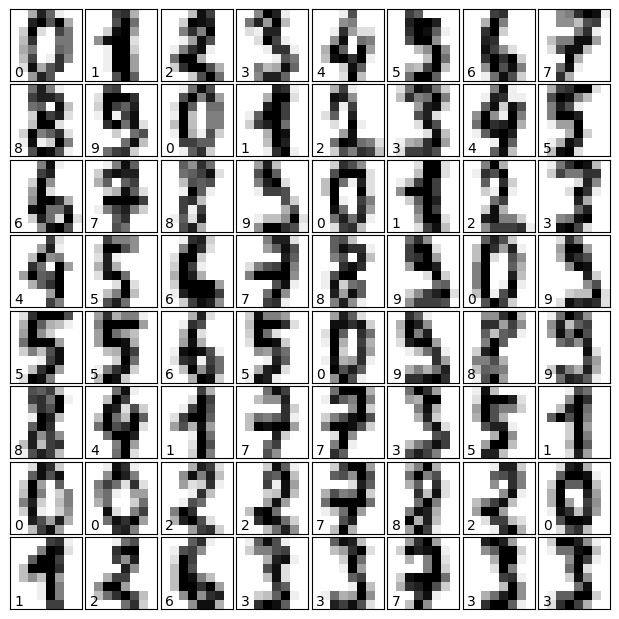

In [201]:
# Figure size (width, height)

fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images

for i in range(64):

    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position

    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    # Display an image at the i-th position

    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # Label the image with the target value

    ax.text(0, 7, str(digits.target[i]))

plt.show()

## K-Means Clustering

What should be the k, the number of clusters, here?

Use the `KMeans()` method to build a model that finds `k` clusters.

In [202]:
from sklearn.cluster import KMeans

### Train and Fit the Model

Because there are 10 digits, there should be 10 clusters.

The `random_state` will ensure that every time you run your code, the model is built in the same way, can be any number.

In [203]:
model = KMeans(n_clusters=10, random_state=42).fit(digits.data)
print(model.cluster_centers_)

[[ 0.00000000e+00  9.37500000e-01  1.01420455e+01  1.44204545e+01
   7.79545455e+00  9.82954545e-01 -8.88178420e-16  2.77555756e-17
   2.27272727e-02  5.22159091e+00  1.37215909e+01  1.26022727e+01
   1.16761364e+01  3.26136364e+00  1.70454545e-02 -4.16333634e-17
   1.13636364e-02  4.59090909e+00  8.13636364e+00  6.10227273e+00
   1.21647727e+01  3.57386364e+00  1.70454545e-02  2.77555756e-17
   0.00000000e+00  9.94318182e-01  2.82954545e+00  6.97727273e+00
   1.25397727e+01  2.55681818e+00  3.97727273e-02  0.00000000e+00
   0.00000000e+00  4.54545455e-02  1.56250000e+00  9.89772727e+00
   1.06875000e+01  1.44318182e+00 -1.33226763e-15  0.00000000e+00
   0.00000000e+00  2.50000000e-01  4.43181818e+00  1.11875000e+01
   7.75568182e+00  2.40909091e+00  8.46590909e-01  1.13636364e-02
   3.46944695e-18  1.18750000e+00  1.09659091e+01  1.36931818e+01
   1.18579545e+01  1.11647727e+01  7.65909091e+00  1.09659091e+00
   0.00000000e+00  9.26136364e-01  1.03352273e+01  1.44545455e+01
   1.35170

C:\Users\ivanx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualizing after K-Means

Visualize all the `centroids`

Because data samples live in a 64-dimensional space, the `centroids` have values so they can be images.


Scikit-learn sometimes calls `centroids` “cluster centers”.

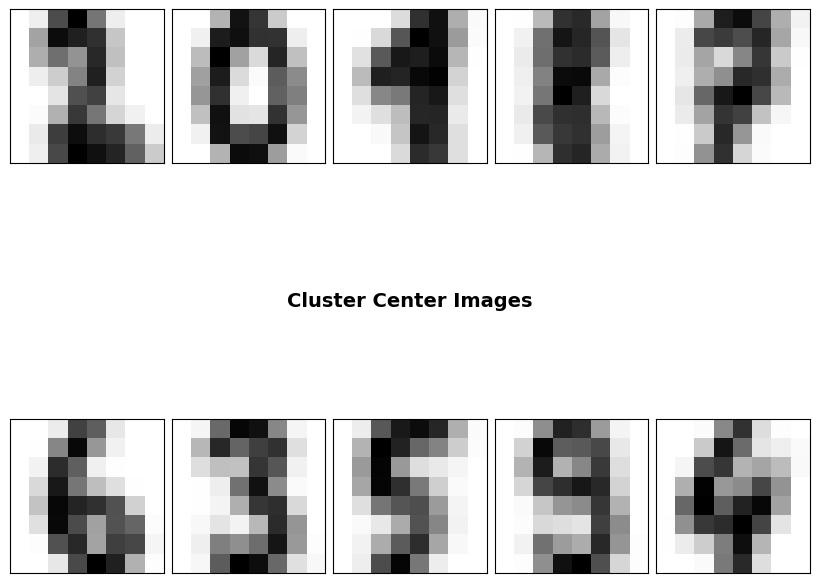

In [204]:
# Figure size (width, height)
fig = plt.figure(figsize=(8, 8))

# Adjust the subplots 
fig.suptitle('Cluster Center Images', fontsize=14, fontweight='bold', y=0.5)
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])

  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary, interpolation='nearest')
  
plt.show()

# Testing Model / Predict

Generate new digits in `/generate_digit`

1337 and 4925 examples

### Ordering Clusters

Because the clusters are not ordered, we need to order them to facilitate the association of the prediction with the associated number.

In [205]:
def order_clusters(predict_sample):
    for i in range(len(predict_sample)):
        if predict_sample[i] == 0:
            print(2, end='')
        elif predict_sample[i] == 1:
            print(0, end='')
        elif predict_sample[i] == 2:
            print(1, end='')
        elif predict_sample[i] == 3:
            print(8, end='')
        elif predict_sample[i] == 4:
            print(7, end='')
        elif predict_sample[i] == 5:
            print(6, end='')
        elif predict_sample[i] == 6:
            print(3, end='')
        elif predict_sample[i] == 7:
            print(5, end='')
        elif predict_sample[i] == 8:
            print(9, end='')
        elif predict_sample[i] == 9:
            print(4, end='')

1337 -> Predicted-> 5357

In [206]:
sample_4925 = np.array([
[0.00,0.38,2.68,0.00,0.00,6.63,0.51,0.00,0.00,4.46,9.68,0.00,0.00,12.74,0.51,0.00,0.00,5.10,7.90,0.00,0.00,12.74,0.00,0.00,0.00,3.56,12.11,3.44,1.27,12.23,0.00,0.00,0.00,0.00,5.98,12.09,12.73,12.49,0.76,0.00,0.00,0.00,0.00,0.00,1.27,11.47,0.00,0.00,0.00,0.00,0.00,0.00,2.04,10.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,2.94,6.37,5.73,2.67,0.00,0.00,0.00,4.97,12.36,7.64,10.07,7.64,0.00,0.00,0.00,8.92,5.09,0.38,10.31,9.17,0.00,0.00,0.00,7.64,11.47,10.82,11.33,11.09,0.00,0.00,0.00,0.25,3.18,3.81,1.78,11.47,0.00,0.00,0.00,0.00,0.00,0.00,4.20,10.95,0.00,0.00,0.00,0.00,0.00,2.42,11.47,5.73,0.00,0.00,0.00,0.00,0.00,6.76,6.25,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.57,11.33,12.73,10.58,2.55,0.00,0.00,0.00,11.95,5.73,0.76,7.77,9.56,0.00,0.00,0.00,5.61,0.00,0.00,4.08,11.34,0.00,0.00,0.00,0.00,0.13,3.45,11.59,5.73,0.00,0.00,0.38,6.64,11.98,12.74,9.56,2.55,1.91,0.00,2.67,10.18,8.91,8.91,10.05,10.18,8.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,7.39,8.53,4.97,3.82,0.38,0.00,0.00,3.31,11.85,6.24,8.79,8.92,1.40,0.00,0.00,6.63,8.41,1.27,1.27,0.51,0.00,0.00,0.00,6.49,11.46,11.46,11.71,11.35,0.51,0.00,0.00,0.00,0.00,0.00,0.00,11.22,2.54,0.00,0.00,0.00,0.00,0.00,3.70,12.10,2.29,0.00,0.00,6.76,10.32,12.62,11.97,5.99,0.00,0.00,0.00,1.40,2.54,1.53,0.00,0.00,0.00,0.00]
])

sample_1337 = np.array([
[0.00,0.00,0.00,0.00,0.26,5.49,3.44,0.00,0.00,0.00,0.00,1.53,10.06,12.73,7.52,0.00,0.00,3.19,8.16,11.97,8.14,8.79,5.60,0.00,0.00,1.78,6.36,3.56,0.00,9.31,3.82,0.00,0.00,0.00,0.00,0.00,0.00,10.58,2.93,0.00,0.00,0.00,0.00,0.00,0.00,11.47,1.65,0.00,0.00,0.00,0.00,0.00,0.00,6.37,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,2.68,6.38,1.27,0.00,0.00,0.00,0.00,4.07,12.35,10.44,8.92,0.00,0.00,0.00,0.00,8.40,5.22,1.65,12.36,0.00,0.00,0.00,0.00,0.00,3.57,9.06,11.97,0.00,0.00,0.00,0.00,0.00,5.85,9.67,12.24,0.63,0.00,0.00,0.00,0.00,0.00,0.76,12.11,1.27,0.00,0.00,0.00,0.76,10.07,11.98,9.18,0.26,0.00,0.00,0.00,0.00,2.42,2.29,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,3.83,4.97,0.38,0.00,0.00,0.00,0.64,8.79,11.70,10.83,6.88,0.00,0.00,0.00,1.65,9.29,3.95,8.16,8.92,0.00,0.00,0.00,0.00,3.44,12.74,12.74,4.97,0.00,0.00,0.00,0.00,0.00,1.27,8.03,6.37,0.00,0.00,0.00,0.00,2.17,8.16,12.49,4.71,0.00,0.00,0.00,0.00,2.17,6.37,2.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.38,2.94,4.72,2.16,0.00,0.00,0.00,3.69,11.84,11.32,11.08,6.37,0.00,0.00,0.00,0.64,2.29,0.13,6.75,6.37,0.00,0.00,0.00,0.00,0.00,0.00,10.83,4.33,0.00,0.00,0.00,0.00,0.00,2.29,12.23,0.38,0.00,0.00,0.00,0.00,0.00,5.99,8.92,0.00,0.00,0.00,0.00,0.00,0.00,8.54,4.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00]
])

predict_sample = model.predict(sample_4925)
order_clusters(predict_sample)
print("")
predict_sample = model.predict(sample_1337)
order_clusters(predict_sample)

1929
1277

4925 -> 2606
1337 -> 2099

### Data associated to Clusters

In [233]:
import pandas as pd

samples = digits.data
target = digits.target

labels = target

samples = [digits.target_names[t] for t in list(target)]
df = pd.DataFrame({'numbers': labels, 'samples': samples})

# Cross-Tabulation
ct = pd.crosstab(df['numbers'], df['samples'], colnames=None)
print(ct)

samples    0    1    2    3    4    5    6    7    8    9
numbers                                                  
0        178    0    0    0    0    0    0    0    0    0
1          0  182    0    0    0    0    0    0    0    0
2          0    0  177    0    0    0    0    0    0    0
3          0    0    0  183    0    0    0    0    0    0
4          0    0    0    0  181    0    0    0    0    0
5          0    0    0    0    0  182    0    0    0    0
6          0    0    0    0    0    0  181    0    0    0
7          0    0    0    0    0    0    0  179    0    0
8          0    0    0    0    0    0    0    0  174    0
9          0    0    0    0    0    0    0    0    0  180


In [235]:
for i in range(10):
    print("Cluster {} has {} samples".format(i, ct[i][i]))

Cluster 0 has 178 samples
Cluster 1 has 182 samples
Cluster 2 has 177 samples
Cluster 3 has 183 samples
Cluster 4 has 181 samples
Cluster 5 has 182 samples
Cluster 6 has 181 samples
Cluster 7 has 179 samples
Cluster 8 has 174 samples
Cluster 9 has 180 samples


Need more data to improve the model